In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.fftpack import fft,ifft
from schrodinger import Schrodinger
import matplotlib.pyplot as plt
import scipy
import sympy as sp

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('poster', font_scale=0.9,  rc={"lines.linewidth": 5})

In [3]:
# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

In [60]:
def getCorrelation(S0,S):

    psi0star = np.conjugate(S0.psi_k)
    psi = S.psi_k
    norm = np.sqrt(sum(np.abs(psi)**2)*sum(np.abs(psi0star)**2))
    wk = hbar*S.k**2/(2*m)
    amp = sum(psi0star*psi*np.exp(-1j*wk*S.t))
    amp = amp/norm
    
    return amp

def getAvgE(S):
    
    psi = S.psi_k
    Ek = hbar**2*S.k**2/(2*m)
    avgE = sum(np.abs(psi)**2*Ek)
    norm = sum(np.abs(psi)**2)
    avgE = avgE/norm
    
    return avgE

def getDeltaE(S):
    
    psi = S.psi_k    
    Ek = hbar**2*S.k**2/(2*m)
    avgE2 = sum(np.abs(psi)**2*Ek**2)
    norm = sum(np.abs(psi)**2)
    avgE2 = avgE2/norm
    
    deltaE = np.sqrt(avgE2-getAvgE(S)**2)
    
    return deltaE
    

In [123]:
#define x grid:
x = np.linspace(-20,20,5000)

# specify potential at grid points
V_x = np.zeros(shape=x.shape)

In [124]:
#Specify initial wave function at grid points:
@np.vectorize
def psiF(x,sigma=1.0,mu=0.0,k0=10):
    norm = 1/(np.pi*sigma**2)**(1/4)
    f = np.exp(-(x-mu)**2/(4*sigma**2))
    f *= np.exp(complex(0,k0*x))
    
    return  norm*f
    
psi_x0 = psiF(x=x)

psi_x0B = psiF(x=x,sigma=5.0)

In [125]:
# define the Schrodinger object which performs the calculations
S0 = Schrodinger(x=x,  psi_x0=psi_x0, V_x=V_x,
                    hbar=hbar, m=m)
S = Schrodinger(x=x,  psi_x0=psi_x0, V_x=V_x,
                    hbar=hbar, m=m)

# define the Schrodinger object which performs the calculations
S0B = Schrodinger(x=x,  psi_x0=psi_x0B, V_x=V_x,
                    hbar=hbar, m=m)
SB = Schrodinger(x=x,  psi_x0=psi_x0B, V_x=V_x,
                    hbar=hbar, m=m)

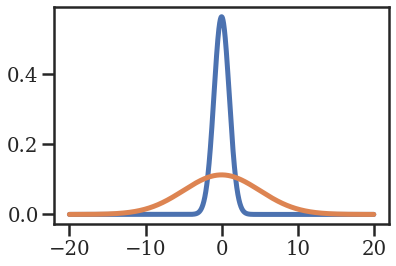

In [126]:
plt.plot(x,np.abs(psi_x0)**2)
plt.plot(x,np.abs(psi_x0B)**2)
plt.show()

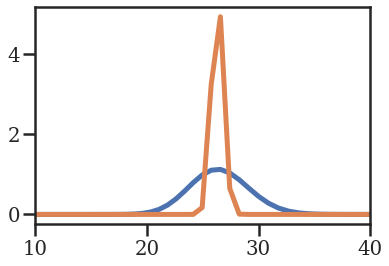

In [147]:
psi = S.psi_k[S.k>0]
k = S.k[S.k>0]
Ek = hbar**2*k**2/(2*m)
avgE2 = np.abs(psi)**2*Ek**2
norm = sum(np.abs(psi)**2)
avgE2 = avgE2/norm


psiB = SB.psi_k[SB.k>0] 
kB = SB.k[SB.k>0]
EkB = hbar**2*kB**2/(2*m)
avgE2B = np.abs(psiB)**2*EkB**2
normB = sum(np.abs(psiB)**2)
avgE2B = avgE2B/normB

plt.plot(Ek,np.abs(psi)**2)
plt.plot(EkB,np.abs(psiB)**2)
plt.xlim(10,40)
plt.show()

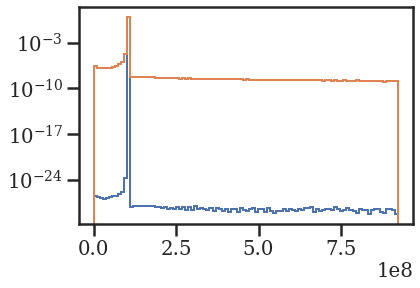

In [172]:
plt.hist((Ek-np.median(EkB))**2,bins=100,histtype='step',weights=np.abs(psi)**2)
plt.hist((EkB-10141.)**2,bins=100,histtype='step',weights=np.abs(psiB)**2)
# plt.xlim(0,10)
plt.yscale('log')
# plt.ylim(1e-10,1)
plt.show()

In [176]:
np.mean(Ek)

13519.303485090788

In [175]:
hbar**2*(10**2)/(2*m)

26.315789473684212

In [139]:
e2 = 0.0
norm = 0.0
for ik,k in enumerate(S.k):
    e2 += (k**4)*np.abs(S.psi_k[ik])**2
    norm += np.abs(S.psi_k[ik])**2
print(e2,norm)

e2B = 0.0
normB = 0.0
for ik,k in enumerate(SB.k):
    e2B += (k**4)*np.abs(SB.psi_k[ik])**2
    normB += np.abs(SB.psi_k[ik])**2
print(e2B,normB)

91402.07459792902 9.004964154401979
97946.35926626313 9.00439568415345


In [131]:
print('E = %1.2f +- %1.2f' %(getAvgE(S),getDeltaE(S)))
print('EB = %1.2f +- %1.2f' %(getAvgE(SB),getDeltaE(SB)))
print('Correlation amplitude = ',getCorrelation(S0,S),'(at t = %1.2f)' %S.t)
print('Correlation amplitude = ',getCorrelation(S0B,SB),'(at t = %1.2f)' %SB.t)

E = 26.38 +- 2.63
EB = 26.32 +- 7.77
Correlation amplitude =  (1+0j) (at t = 0.00)
Correlation amplitude =  (1+0j) (at t = 0.00)


In [83]:
tpts = []
amp = []
for n in range(100):
    S.time_step(dt=1e-2,Nsteps=5)
    tpts.append(S.t)
    amp.append(getCorrelation(S0,S))
amp2 = np.abs(amp)**2    

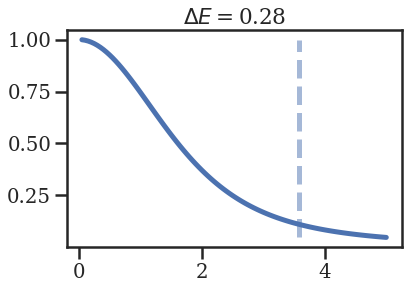

In [88]:
deltaT = hbar/getDeltaE(S)
plt.plot(tpts,amp2)
plt.vlines(deltaT,ymin=min(amp2),ymax=max(amp2),alpha=0.5,linestyle='--')
plt.title(r'$\Delta E = $%1.2f' %getDeltaE(S))
plt.show()

In [85]:
deltaT

3.5826743579983518

In [86]:
1/0.28

3.571428571428571